## Assessment_Recruitment_Pro_Hire_DSC_Telkom

### Load Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


### Load Data

In [105]:
#load train dataset
df_train = pd.read_csv('training_set.csv', names = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
                                                   'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
                                                   'x_19','target'])
df_train.head(5)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,target
0,-248.445064,17.830425,-370.358504,-40.783802,201.567103,-15.783239,84.613020,266.327464,143.581177,41.188621,...,41.633151,3.229590,31.146842,-11.423844,8.556134,30.207449,-4.902167,-48.332019,-23.966277,2.0
1,-44.887909,28.965221,-186.425278,-108.986587,88.485337,-31.308450,101.147990,-26.126046,92.609277,-5.013990,...,-5.714798,-35.703560,134.028079,-113.142465,66.813669,3.161783,93.715804,56.368745,24.502708,2.0
2,-121.113015,-19.997603,186.701561,42.788975,-135.894249,3.445590,-71.713162,-50.481820,-55.657535,-42.241996,...,-15.144846,-111.025540,117.339831,-22.469335,34.945886,-109.657800,-85.268224,-0.366521,142.339664,2.0
3,19.190520,-2.111783,117.586214,68.377932,-104.437958,-121.853049,118.203126,70.962663,-145.213247,14.930190,...,-12.855547,-4.537585,39.040953,70.344999,49.025390,-21.290668,-112.369923,-118.020315,35.158850,1.0
4,-65.926767,46.067187,-145.320633,33.525273,141.670135,70.875171,82.294526,138.057880,-177.650219,73.530859,...,5.485391,-35.234924,105.421899,-15.983181,58.290686,-55.467941,-158.308484,-11.189883,10.512756,1.0


In [106]:
#load test dataset
df_test = pd.read_csv('test_set.csv', names = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
                                                   'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
                                                   'x_19'])
df_test.head(5)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
0,6.985278,-24.376185,-67.534866,-84.807607,-32.046698,105.779139,18.522057,-30.072502,59.680790,-10.243477,-143.881639,3.539415,-67.197899,85.240541,100.114007,3.998199,-249.273817,111.914402,-10.871451,63.884219
1,0.477027,78.098773,-165.926432,-94.688766,195.248556,120.357766,16.986081,-141.158790,-59.848439,103.943630,-130.716540,-14.191104,48.552744,-5.913016,26.144545,25.247061,-71.538672,-30.696753,67.176863,-26.336899
2,-100.522055,63.502689,36.368877,24.343810,-54.754512,49.931363,-157.346399,53.609828,-15.250627,6.191715,91.477832,-8.464808,-6.836888,318.072696,102.804747,24.406161,30.236164,-59.971020,-59.251893,24.595837
3,-79.056022,-19.034376,-87.851593,18.989430,129.156202,71.775972,54.377089,36.044274,93.366497,40.270391,-88.597058,1.679444,27.143026,11.948213,-10.007375,NaN,-97.803525,-156.719795,-15.479173,144.547514
4,25.978992,18.616395,62.512001,1.198931,-28.407960,66.513388,6.724048,NaN,2.399504,93.967159,-6.191297,-3.205708,-23.046805,5.934627,-30.026842,2.371024,-58.494352,-66.662268,-155.546954,141.737028


### Check Dataset

In [107]:
#check data train information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
x_0       7491 non-null float64
x_1       7496 non-null float64
x_2       7489 non-null float64
x_3       7488 non-null float64
x_4       7498 non-null float64
x_5       7493 non-null float64
x_6       7493 non-null float64
x_7       7496 non-null float64
x_8       7487 non-null float64
x_9       7496 non-null float64
x_10      7497 non-null float64
x_11      7494 non-null float64
x_12      7495 non-null float64
x_13      7497 non-null float64
x_14      7493 non-null float64
x_15      7494 non-null float64
x_16      7493 non-null float64
x_17      7490 non-null float64
x_18      7487 non-null float64
x_19      7490 non-null float64
target    7500 non-null float64
dtypes: float64(21)
memory usage: 1.2 MB


In [108]:
#define numerical variables
numcolumns = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
            'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18','x_19']

In [109]:
#check data train dimension
df_train.shape

(7500, 21)

In [110]:
#change target data type to integer
df_train['target'] = df_train['target'].astype('int64')
df_train.dtypes

x_0       float64
x_1       float64
x_2       float64
x_3       float64
x_4       float64
x_5       float64
x_6       float64
x_7       float64
x_8       float64
x_9       float64
x_10      float64
x_11      float64
x_12      float64
x_13      float64
x_14      float64
x_15      float64
x_16      float64
x_17      float64
x_18      float64
x_19      float64
target      int64
dtype: object

In [111]:
#check summary statistics of data train
df_train.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,target
count,7491.000000,7496.000000,7489.000000,7488.000000,7498.000000,7493.000000,7493.000000,7496.000000,7487.000000,7496.000000,...,7494.000000,7495.000000,7497.000000,7493.000000,7494.000000,7493.000000,7490.000000,7487.000000,7490.000000,7500.000000
mean,-49.319147,13.081739,-74.491018,-34.077794,57.714774,46.042808,49.075535,-13.929773,17.173137,26.382226,...,5.972676,-0.108916,74.283261,17.089628,34.189994,-66.411232,-30.867304,-50.262963,11.238753,0.995867
std,86.357242,35.900733,114.516193,58.755313,115.575267,69.530793,71.540902,123.575711,68.735709,48.198673,...,13.800494,70.752688,91.027601,59.930992,35.098442,82.552539,85.710470,59.620113,81.891433,0.815969
min,-385.508272,-129.965534,-509.193182,-238.474059,-355.005476,-186.444341,-248.738059,-394.549708,-229.837686,-179.695760,...,-45.677898,-245.445619,-296.201496,-202.856601,-88.732875,-415.530937,-335.959448,-267.557521,-277.111889,0.000000
25%,-109.259977,-10.955784,-156.074300,-77.165415,-16.327522,-0.547570,0.721017,-107.615868,-27.911050,-5.699987,...,-3.270665,-48.438824,12.051437,-24.077855,10.203643,-122.620766,-90.629257,-90.221398,-43.360445,0.000000
50%,-49.616809,13.153944,-81.221917,-41.957858,57.808854,46.257951,47.843543,-33.829262,17.129354,26.359630,...,5.923604,-0.760859,74.275748,16.986205,34.127258,-67.403351,-39.005473,-49.689096,11.693632,1.000000
75%,9.951283,36.903846,4.260750,4.376110,127.750682,94.171062,96.814801,78.526201,63.062712,59.513958,...,15.171162,48.147412,136.357943,57.817623,58.219928,-9.591275,23.906471,-9.682337,66.582544,2.000000
max,282.294275,148.581151,341.366225,241.800322,553.188692,305.931648,298.863678,437.431776,262.651212,217.387580,...,68.908360,276.671151,401.373445,233.175730,158.552462,294.663390,333.091480,171.319361,299.810042,2.000000


In [112]:
#check target proportion in data train
df_train.target.value_counts()

0    2512
1    2507
2    2481
Name: target, dtype: int64

In [113]:
#check data test dimension
df_test.shape

(2500, 20)

In [114]:
#check data test information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
x_0     2497 non-null float64
x_1     2498 non-null float64
x_2     2500 non-null float64
x_3     2496 non-null float64
x_4     2497 non-null float64
x_5     2500 non-null float64
x_6     2497 non-null float64
x_7     2495 non-null float64
x_8     2499 non-null float64
x_9     2499 non-null float64
x_10    2498 non-null float64
x_11    2498 non-null float64
x_12    2492 non-null float64
x_13    2495 non-null float64
x_14    2494 non-null float64
x_15    2497 non-null float64
x_16    2498 non-null float64
x_17    2500 non-null float64
x_18    2497 non-null float64
x_19    2496 non-null float64
dtypes: float64(20)
memory usage: 390.7 KB


In [115]:
#check summary statistics of data test
df_test.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
count,2497.000000,2498.000000,2500.000000,2496.000000,2497.000000,2500.000000,2497.000000,2495.000000,2499.000000,2499.000000,2498.000000,2498.000000,2492.000000,2495.000000,2494.000000,2497.000000,2498.000000,2500.000000,2497.000000,2496.000000
mean,-51.764370,11.923805,-73.721264,-34.309731,55.972085,45.312505,50.066274,-13.350861,16.585657,25.673069,-80.180269,5.980558,-0.953388,74.598132,16.495379,33.228707,-65.500201,-29.053986,-52.503480,11.107005
std,85.396853,33.707642,116.260174,60.217851,117.853343,69.015803,73.844109,124.080840,67.562073,46.415646,92.553879,13.380759,71.951853,89.539230,61.491875,35.598856,82.104074,89.066546,59.911438,83.207229
min,-347.880426,-122.056947,-502.541305,-196.396370,-328.152326,-164.733853,-198.567494,-337.709556,-212.308337,-131.667460,-389.023294,-45.647303,-247.239472,-304.908865,-225.854191,-99.205232,-347.183514,-303.280051,-272.486738,-261.570075
25%,-107.675781,-10.596259,-156.992798,-78.622659,-21.770541,-0.913831,1.260078,-109.090551,-27.016838,-6.338873,-142.225405,-3.139483,-50.913915,15.045419,-23.937974,9.504775,-120.836500,-90.812892,-92.858891,-45.218573
50%,-52.651851,11.440416,-77.564880,-42.469364,55.650792,46.257594,49.812377,-29.351079,16.026316,25.234709,-78.032815,5.963617,-0.558755,77.076595,18.453668,32.880378,-66.232236,-37.657939,-53.444701,11.619477
75%,8.572123,34.329045,5.955940,5.896302,127.890198,91.375940,99.410069,78.937982,62.706689,57.277988,-18.811316,14.524964,47.952511,133.573148,57.348379,57.062389,-11.667865,28.255646,-12.315050,67.797171
max,195.748913,136.023461,324.619807,204.392957,533.209670,316.037352,291.092572,428.419329,263.407653,178.235022,259.554515,53.801038,248.675653,418.885858,246.893304,154.638857,204.816772,259.641336,201.977052,289.141375


### Check Missing Values

In [116]:
def missing_values_table(df_pd):
    """Input pandas dataframe and Return columns with missing value&percentage and stored as pandas dataframe"""
    mis_val = df_pd.isnull().sum() #count total of null in each columns in dataframe
    mis_val_percent = 100 * df_pd.isnull().sum() / len(df_pd) #count percentage of null in each columns
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #join to left (as column) between mis_val and mis_val_percent and create it as dataframe
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #rename columns in table, mis_val to Missing Values and mis_val_percent to % of Total Values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)         #sort column % of Total Values descending and round 1 after point(coma)
    print ("Your selected dataframe has " + str(df_pd.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    return mis_val_table_ren_columns

In [117]:
#check missing values in data train
a=missing_values_table(df_train)
a

Your selected dataframe has 21 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
x_8,13,0.2
x_18,13,0.2
x_3,12,0.2
x_2,11,0.1
x_19,10,0.1
x_17,10,0.1
x_0,9,0.1
x_6,7,0.1
x_14,7,0.1
x_16,7,0.1


In [118]:
#check missing values in data test
b=missing_values_table(df_test)
b

Your selected dataframe has 20 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
x_12,8,0.3
x_14,6,0.2
x_7,5,0.2
x_13,5,0.2
x_19,4,0.2
x_3,4,0.2
x_18,3,0.1
x_15,3,0.1
x_0,3,0.1
x_6,3,0.1


### Handle Missing Values

All variables are numeric so to fill missing values in each columns use average in it's columns. In data train all columns have missing values while in data test just 17 columns which has missing values.

In [119]:
#fill missing values in data train
df_train=df_train.fillna(df_train.mean())

In [120]:
#Check missing values in data train after filling with average
df_train.isnull().sum()

x_0       0
x_1       0
x_2       0
x_3       0
x_4       0
x_5       0
x_6       0
x_7       0
x_8       0
x_9       0
x_10      0
x_11      0
x_12      0
x_13      0
x_14      0
x_15      0
x_16      0
x_17      0
x_18      0
x_19      0
target    0
dtype: int64

In [121]:
#fill missing values in data test
df_test=df_test.fillna(df_test.mean())

In [122]:
#Check missing values in data test after filling with average
df_test.isnull().sum()

x_0     0
x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
x_6     0
x_7     0
x_8     0
x_9     0
x_10    0
x_11    0
x_12    0
x_13    0
x_14    0
x_15    0
x_16    0
x_17    0
x_18    0
x_19    0
dtype: int64

### EDA
Check distibution in all numerical variables in data train

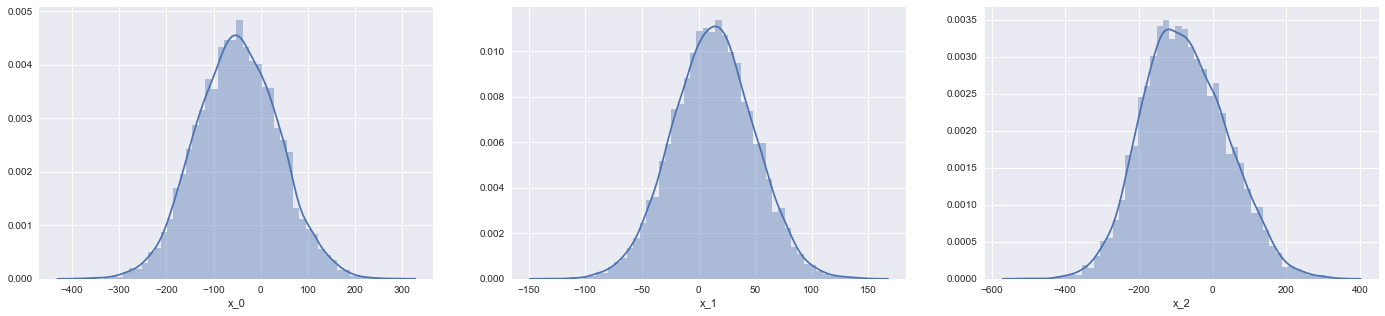

In [123]:
#density plot x_0, x_1, x_2
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(df_train['x_0'])
plt.subplot(132)
sns.distplot(df_train['x_1'])
plt.subplot(133)
sns.distplot(df_train['x_2'])
plt.show()

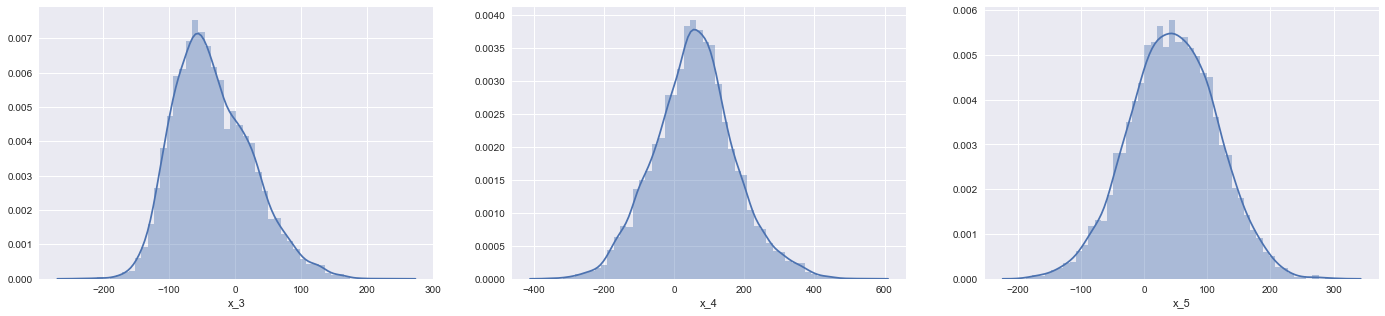

In [124]:
#density plot x_3, x_4, x_5
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(df_train['x_3'])
plt.subplot(132)
sns.distplot(df_train['x_4'])
plt.subplot(133)
sns.distplot(df_train['x_5'])
plt.show()

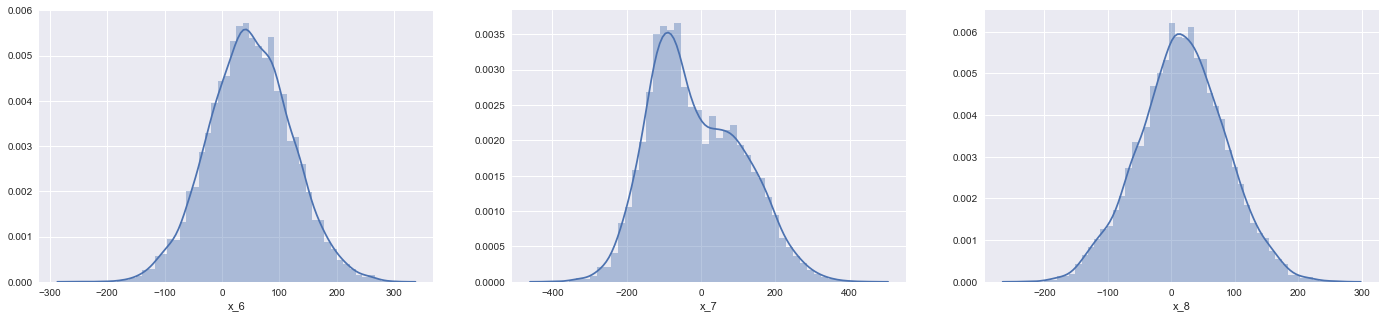

In [125]:
#density plot x_6, x_7, x_8
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(df_train['x_6'])
plt.subplot(132)
sns.distplot(df_train['x_7'])
plt.subplot(133)
sns.distplot(df_train['x_8'])
plt.show()

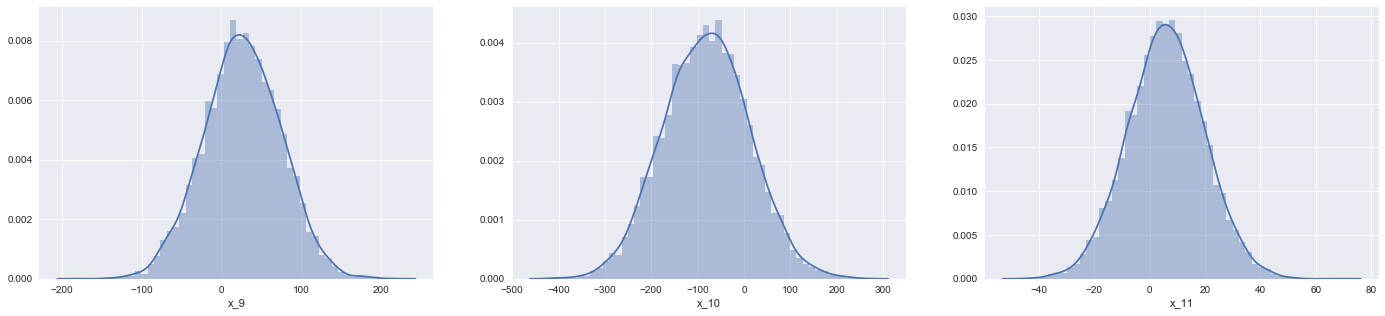

In [126]:
#density plot x_9, x_10, x_11
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(df_train['x_9'])
plt.subplot(132)
sns.distplot(df_train['x_10'])
plt.subplot(133)
sns.distplot(df_train['x_11'])
plt.show()

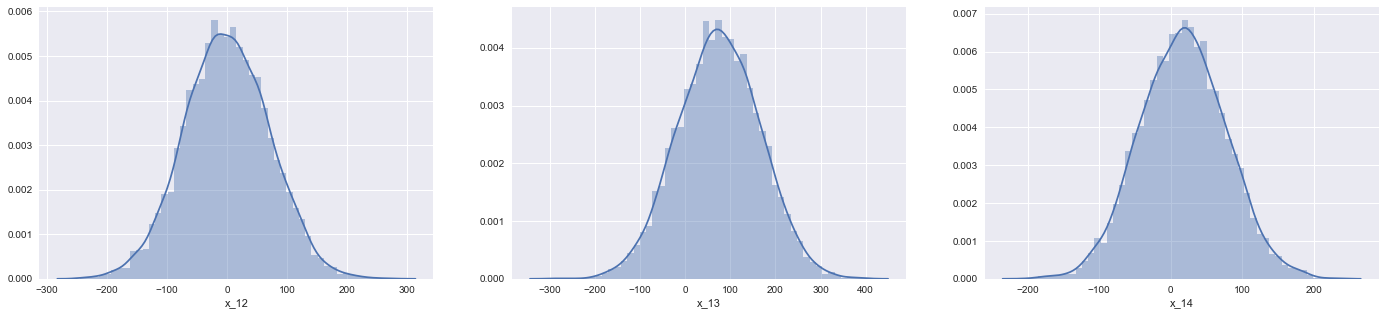

In [127]:
#density plot x_12, x_13, x_14
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(df_train['x_12'])
plt.subplot(132)
sns.distplot(df_train['x_13'])
plt.subplot(133)
sns.distplot(df_train['x_14'])
plt.show()

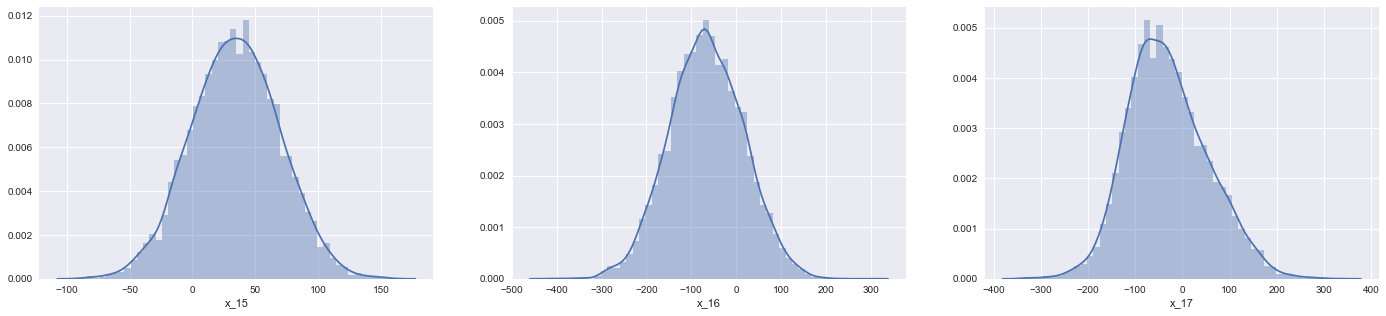

In [128]:
#density plot x_15, x_16, x_17
plt.figure(figsize=(24,5))
plt.subplot(131)
sns.distplot(df_train['x_15'])
plt.subplot(132)
sns.distplot(df_train['x_16'])
plt.subplot(133)
sns.distplot(df_train['x_17'])
plt.show()

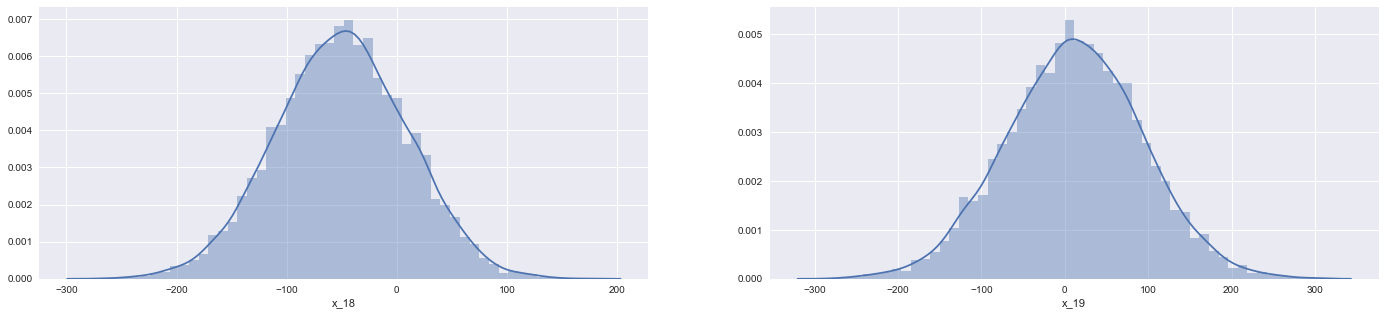

In [129]:
#density plot x_18, x_19
plt.figure(figsize=(24,5))
plt.subplot(121)
sns.distplot(df_train['x_18'])
plt.subplot(122)
sns.distplot(df_train['x_19'])
plt.show()

#### Numerical variable VS Target

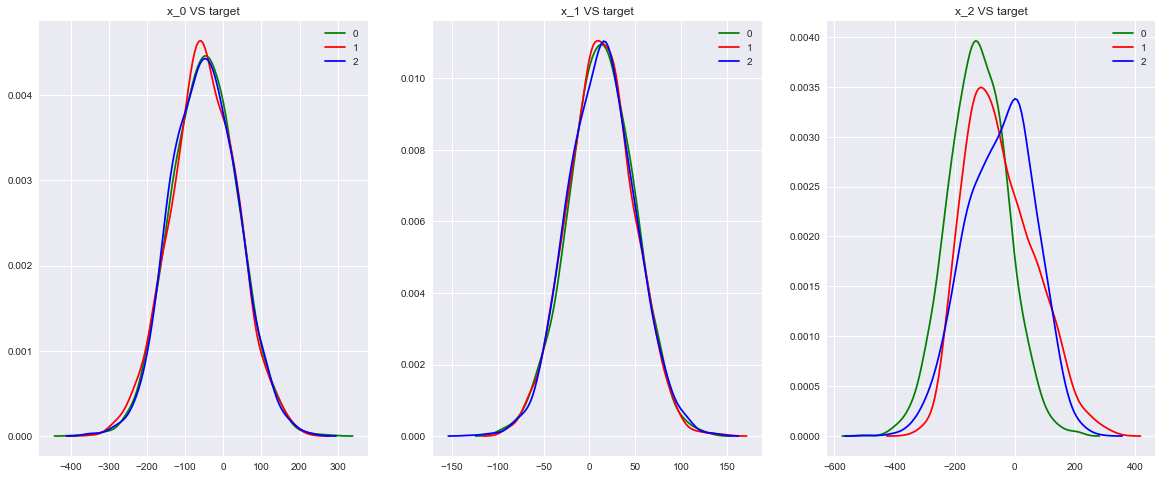

In [130]:
#show distribution x_0, x_1, x_2 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_0"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_0"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_0"], label="2", color="blue")
plt.title("x_0 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_1"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_1"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_1"], label="2", color="blue")
plt.title("x_1 VS target")
plt.subplot(133)
sns.kdeplot(df_train[df_train["target"]==0]["x_2"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_2"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_2"], label="2", color="blue")
plt.title("x_2 VS target")
plt.show()

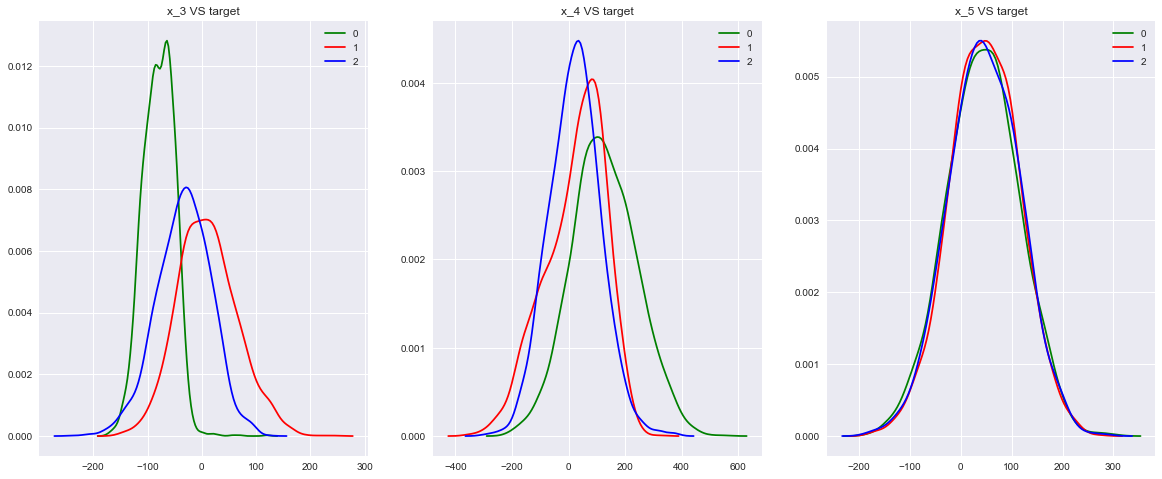

In [131]:
#show distribution x_3, x_4, x_5 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_3"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_3"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_3"], label="2", color="blue")
plt.title("x_3 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_4"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_4"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_4"], label="2", color="blue")
plt.title("x_4 VS target")
plt.subplot(133)
sns.kdeplot(df_train[df_train["target"]==0]["x_5"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_5"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_5"], label="2", color="blue")
plt.title("x_5 VS target")
plt.show()

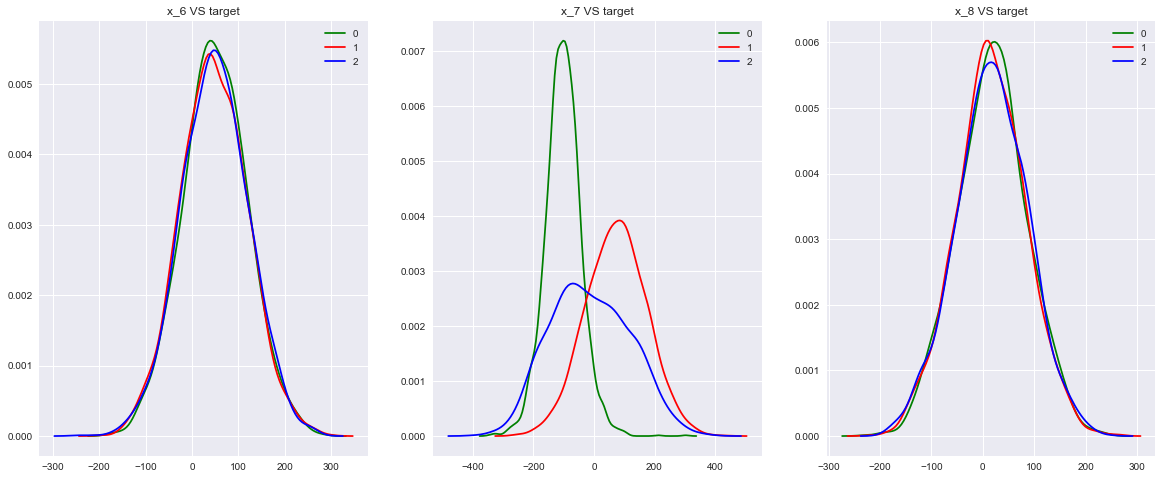

In [132]:
#show distribution x_6, x_7, x_8 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_6"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_6"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_6"], label="2", color="blue")
plt.title("x_6 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_7"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_7"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_7"], label="2", color="blue")
plt.title("x_7 VS target")
plt.subplot(133)
sns.kdeplot(df_train[df_train["target"]==0]["x_8"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_8"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_8"], label="2", color="blue")
plt.title("x_8 VS target")
plt.show()

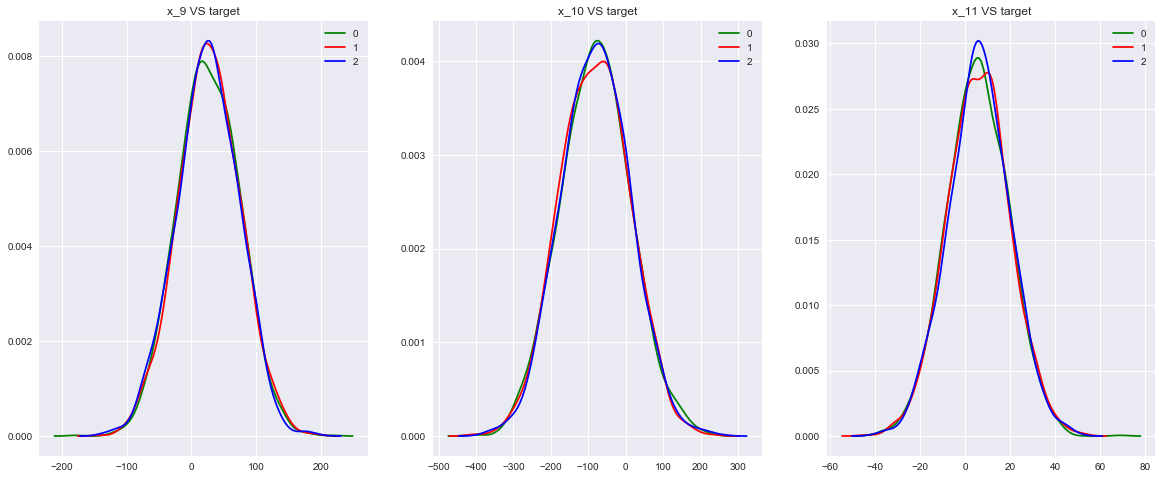

In [133]:
#show distribution x_9, x_10, x_11 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_9"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_9"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_9"], label="2", color="blue")
plt.title("x_9 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_10"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_10"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_10"], label="2", color="blue")
plt.title("x_10 VS target")
plt.subplot(133)
sns.kdeplot(df_train[df_train["target"]==0]["x_11"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_11"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_11"], label="2", color="blue")
plt.title("x_11 VS target")
plt.show()

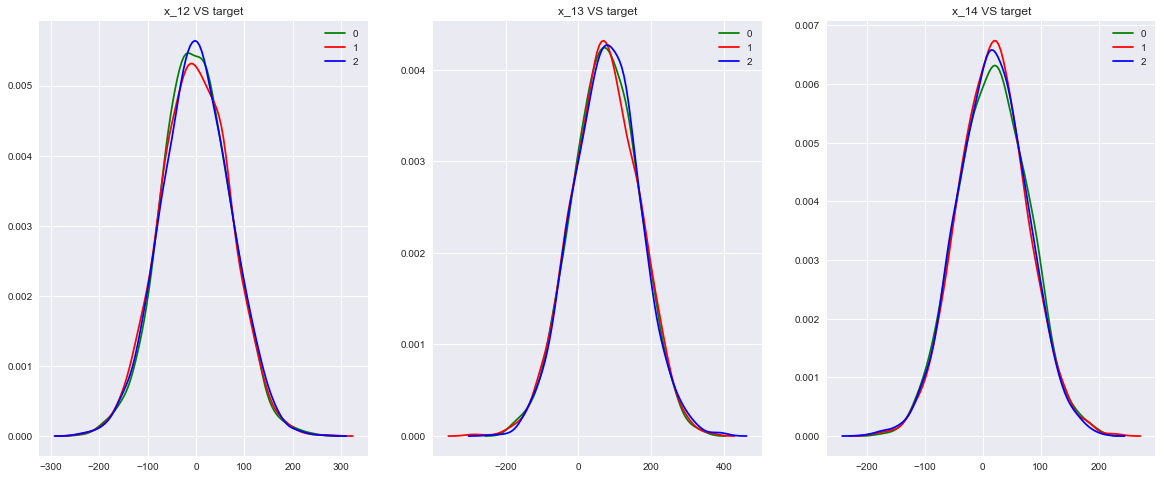

In [134]:
#show distribution x_12, x_13, x_14 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_12"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_12"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_12"], label="2", color="blue")
plt.title("x_12 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_13"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_13"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_13"], label="2", color="blue")
plt.title("x_13 VS target")
plt.subplot(133)
sns.kdeplot(df_train[df_train["target"]==0]["x_14"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_14"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_14"], label="2", color="blue")
plt.title("x_14 VS target")
plt.show()

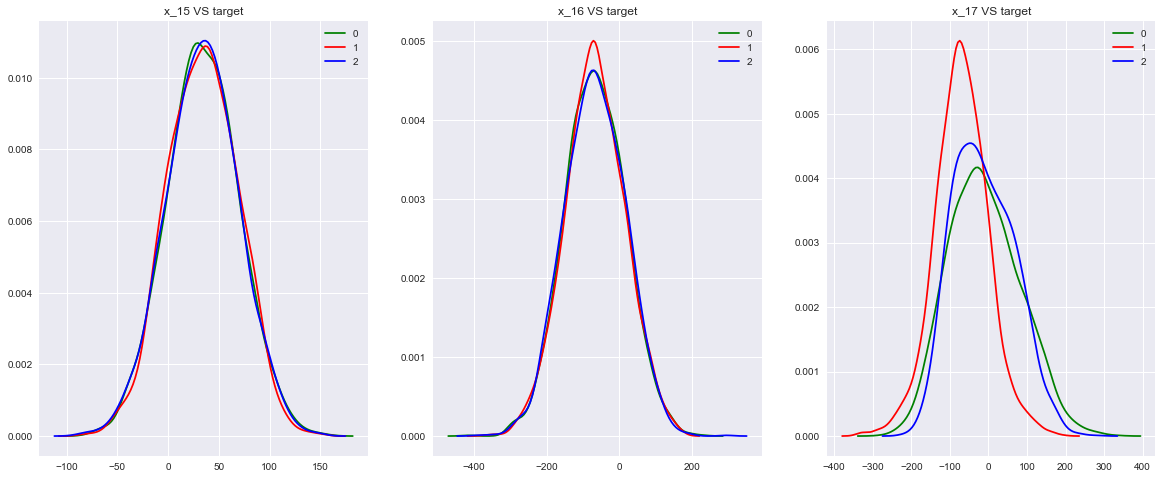

In [135]:
#show distribution x_15, x_16, x_17 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_15"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_15"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_15"], label="2", color="blue")
plt.title("x_15 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_16"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_16"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_16"], label="2", color="blue")
plt.title("x_16 VS target")
plt.subplot(133)
sns.kdeplot(df_train[df_train["target"]==0]["x_17"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_17"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_17"], label="2", color="blue")
plt.title("x_17 VS target")
plt.show()

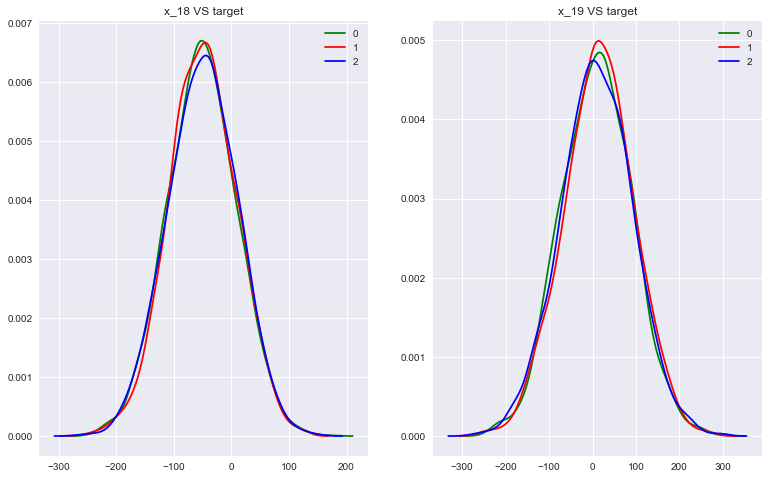

In [136]:
#show distribution x_18, x_19 in type of target
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.kdeplot(df_train[df_train["target"]==0]["x_18"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_18"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_18"], label="2", color="blue")
plt.title("x_18 VS target")
plt.subplot(132)
sns.kdeplot(df_train[df_train["target"]==0]["x_19"], label="0", color="green")
sns.kdeplot(df_train[df_train["target"]==1]["x_19"], label="1", color="red")
sns.kdeplot(df_train[df_train["target"]==2]["x_19"], label="2", color="blue")
plt.title("x_19 VS target")
plt.show()

In [137]:
# drop target from dataframe
df_train_cor=df_train.drop(['target'],1)

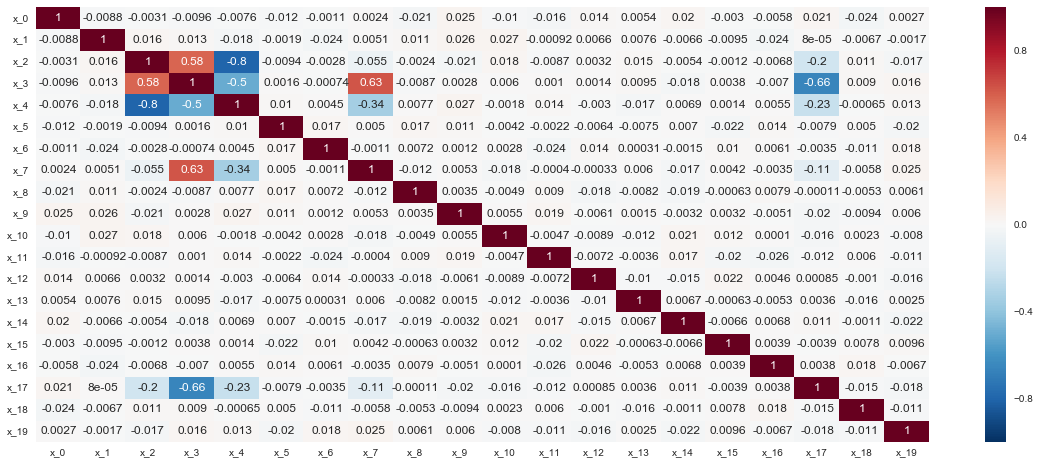

In [138]:
# check correlation each variables using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df_train_cor.corr(), annot=True)
plt.show()

### Check Outlier

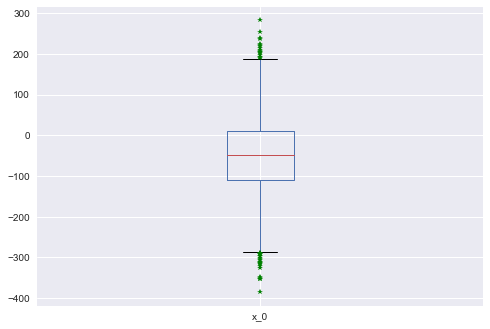

In [139]:
df_train[["x_0"]].boxplot(sym='g-*', grid=True)
plt.show()

### Handle Outlier in Data train

In [140]:
#define dataframe for calculate quantile from data train
df_train_describe=df_train.describe()
df_train_describe

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,target
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,-49.319147,13.081739,-74.491018,-34.077794,57.714774,46.042808,49.075535,-13.929773,17.173137,26.382226,...,5.972676,-0.108916,74.283261,17.089628,34.189994,-66.411232,-30.867304,-50.262963,11.238753,0.995867
std,86.305405,35.891157,114.432173,58.708284,115.559854,69.498333,71.507504,123.542748,68.676104,48.185817,...,13.794972,70.729097,91.009391,59.903014,35.084398,82.514000,85.653303,59.568413,81.836813,0.815969
min,-385.508272,-129.965534,-509.193182,-238.474059,-355.005476,-186.444341,-248.738059,-394.549708,-229.837686,-179.695760,...,-45.677898,-245.445619,-296.201496,-202.856601,-88.732875,-415.530937,-335.959448,-267.557521,-277.111889,0.000000
25%,-109.112955,-10.944938,-156.032293,-77.105294,-16.323607,-0.444946,0.794276,-107.585139,-27.839576,-5.668156,...,-3.266427,-48.429442,12.056491,-23.999573,10.212252,-122.597665,-90.531404,-90.072198,-43.264877,0.000000
50%,-49.455063,13.119754,-81.031875,-41.881169,57.780185,46.170697,47.975348,-33.797301,17.173137,26.382226,...,5.943098,-0.735124,74.281863,17.065490,34.140296,-67.348758,-38.820948,-49.800034,11.647752,1.000000
75%,9.892844,36.888266,4.137465,4.345357,127.699477,94.141154,96.790706,78.484658,62.974799,59.485614,...,15.168921,48.096228,136.295010,57.790436,58.176833,-9.753325,23.875194,-9.739941,66.517830,2.000000
max,282.294275,148.581151,341.366225,241.800322,553.188692,305.931648,298.863678,437.431776,262.651212,217.387580,...,68.908360,276.671151,401.373445,233.175730,158.552462,294.663390,333.091480,171.319361,299.810042,2.000000


In [141]:
#function to calculate uppler side
def upper_value(b,c):
    """Input is quantile dataframe and name of numerical column and Retrun upper value from the column"""
    q1 = b[c].iloc[4] #select value of q1 from the column
    q2 = b[c].iloc[5] #select value of q2 from the column
    q3 = b[c].iloc[6] #select value of q3 from the column
    IQR=q3-q1  #calculate the value of IQR
    upper= q3 + (IQR*1.5)   #calculate the value of upper side
    return upper

In [142]:
#function to calculate lower side
def lower_value(b,c):
    """Input is quantile dataframe and name of numerical column and Retrun upper value from the column"""
    q1 = b[c].iloc[4] #select value of q1 from the column
    q2 = b[c].iloc[5] #select value of q2 from the column
    q3 = b[c].iloc[6] #select value of q3 from the column
    IQR=q3-q1  #calculate the value of IQR
    lower= q1-(IQR*1.5)   #calculate the value of lower side
    return lower

In [143]:
#replace outlier with upper side in data train
for i in numcolumns:
    upper=upper_value(df_train_describe,i)
    df_train.loc[(df_train[i] > upper), i] = upper

In [144]:
#replace outlier with lower side in data train
for i in numcolumns:
    lower=lower_value(df_train_describe,i)
    df_train.loc[(df_train[i] < lower), i] = lower

### Handle outlier in Data test

In [145]:
#define dataframe for calculate quantile from data test
df_test_describe=df_test.describe()
df_test_describe

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,-51.764370,11.923805,-73.721264,-34.309731,55.972085,45.312505,50.066274,-13.350861,16.585657,25.673069,-80.180269,5.980558,-0.953388,74.598132,16.495379,33.228707,-65.500201,-29.053986,-52.503480,11.107005
std,85.345579,33.694150,116.260174,60.169638,117.782581,69.015803,73.799772,123.956647,67.548554,46.406358,92.516835,13.375403,71.836592,89.449610,61.418011,35.577482,82.071212,89.066546,59.875466,83.140610
min,-347.880426,-122.056947,-502.541305,-196.396370,-328.152326,-164.733853,-198.567494,-337.709556,-212.308337,-131.667460,-389.023294,-45.647303,-247.239472,-304.908865,-225.854191,-99.205232,-347.183514,-303.280051,-272.486738,-261.570075
25%,-107.564050,-10.580671,-156.992798,-78.505813,-21.739977,-0.913831,1.437941,-109.058457,-27.014786,-6.305464,-142.212288,-3.139039,-50.248391,15.128334,-23.717916,9.513826,-120.677783,-90.812892,-92.751261,-45.167551
50%,-52.311825,11.461509,-77.564880,-42.230650,55.792232,46.257594,49.832765,-28.971525,16.036856,25.277685,-78.101710,5.971057,-0.805797,76.738877,18.325048,32.963938,-66.214913,-37.657939,-53.398576,11.509494
75%,8.518994,34.295127,5.955940,5.836185,127.889074,91.375940,99.309436,78.690984,62.682496,57.277319,-18.818265,14.505191,47.793829,133.444590,57.281198,57.038258,-11.723712,28.255646,-12.483449,67.407881
max,195.748913,136.023461,324.619807,204.392957,533.209670,316.037352,291.092572,428.419329,263.407653,178.235022,259.554515,53.801038,248.675653,418.885858,246.893304,154.638857,204.816772,259.641336,201.977052,289.141375


In [146]:
#replace outlier with upper side in data test
for i in numcolumns:
    upper=upper_value(df_test_describe,i)
    df_test.loc[(df_test[i] > upper),i] = upper

In [147]:
#replace outlier with lower side in data test
for i in numcolumns:
    lower=lower_value(df_test_describe,i)
    df_test.loc[(df_test[i] < lower),i] = lower

### Features Importance

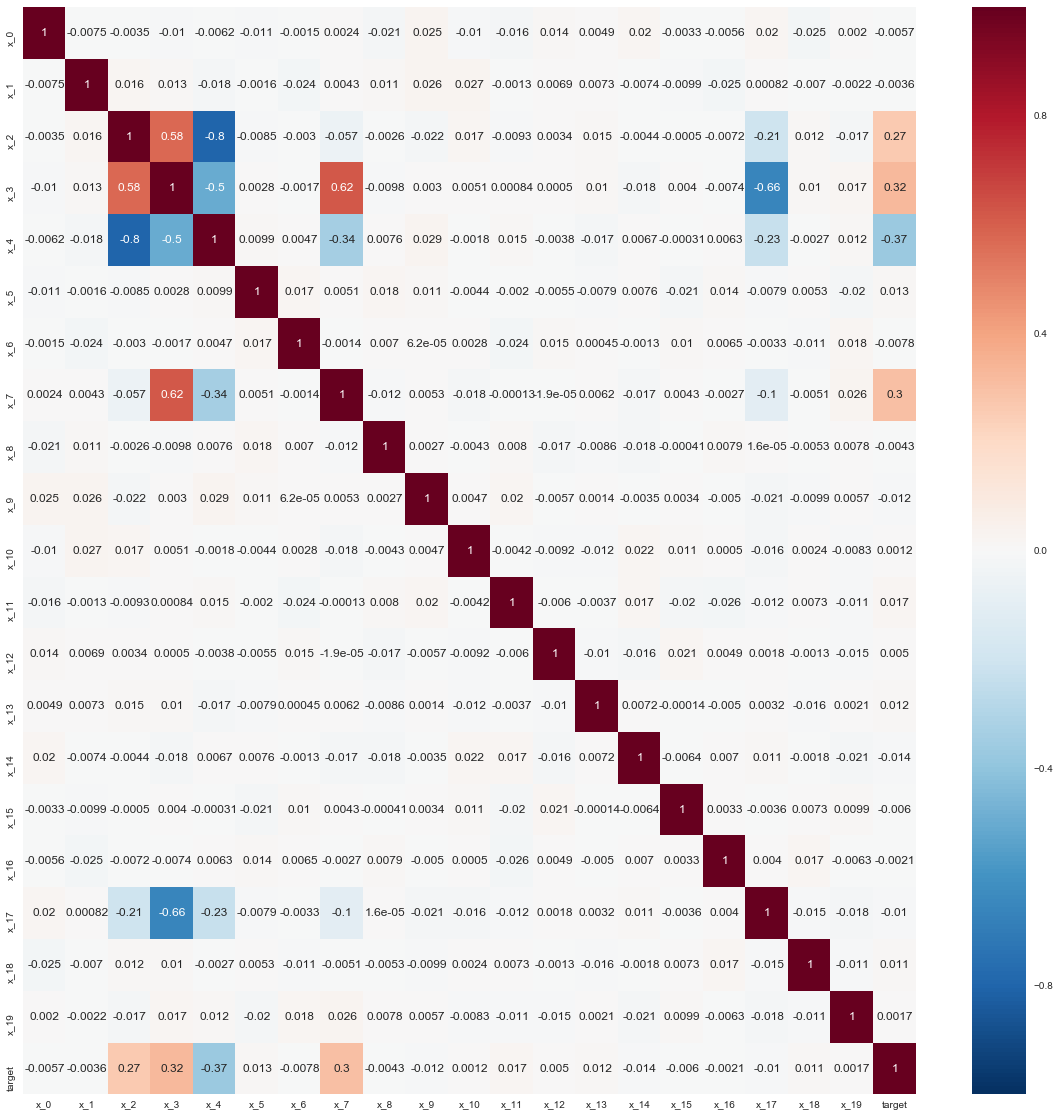

In [148]:
# use heatmap to see feature importance
corrmat= df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df_train[top_corr_features].corr(),annot=True)
plt.show()

### Split data train to train and test data

In [157]:
#define X and Y
X = df_train.drop(['target'],1)
Y = df_train['target']

In [158]:
#split X, Y to 0.7 train and 0.3 test
train_X,test_X,train_y,test_y= train_test_split(X,Y,test_size=0.3,random_state=123)

### Modelling & Evaluation

There are 4 algorithma machine learning that used for modelling in this case, they are:
 - Desicion Tree
 - Random Forest
 - SVM
 - Gradient Boosting
 
Model evaluation that used are confusion matrix and ROC, there is different on treating Y (target) multi-class at those both model evaluation. If want evaluate model using ROC so Y (target) have to be changed to binary firstly but does not if model evaluation that used is confusion matrix.

#### Decision Tree

In [159]:
#create model decision tree
decisiontree = DecisionTreeClassifier(random_state = 123, max_depth = 2)
decisiontree.fit(train_X, train_y)

#create prediction
dtpred = decisiontree.predict(test_X)

In [160]:
#evaluation model using confusion matrix
cm = confusion_matrix(test_y,dtpred)
print(cm)
acc= accuracy_score(test_y, dtpred)
print('acc:',acc)
print(classification_report(test_y, dtpred))

[[665  10  71]
 [ 78 496 190]
 [210 112 418]]
acc: 0.7017777777777777
             precision    recall  f1-score   support

          0       0.70      0.89      0.78       746
          1       0.80      0.65      0.72       764
          2       0.62      0.56      0.59       740

avg / total       0.71      0.70      0.70      2250



In [161]:
#check predict proba of decision tree
dtpred_proba=decisiontree.predict_proba(test_X)
dtpred_proba

array([[0.70771253, 0.07449606, 0.21779141],
       [0.02124646, 0.82507082, 0.15368272],
       [0.70771253, 0.07449606, 0.21779141],
       ...,
       [0.70771253, 0.07449606, 0.21779141],
       [0.02124646, 0.82507082, 0.15368272],
       [0.70771253, 0.07449606, 0.21779141]])

#### ROC

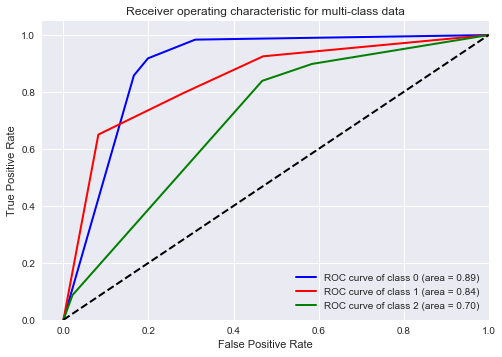

In [162]:
# Binarize the output for ROC evaluation
train_y2 = label_binarize(train_y, classes=[0, 1, 2])
test_y2 = label_binarize(test_y, classes=[0, 1, 2])
n_classes= test_y2.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(decisiontree)
y_score = classifier.fit(train_X, train_y2).predict_proba(test_X)

# Compute ROC curve and ROC area for each class
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [163]:
#Create model using random forest
rf = RandomForestClassifier(n_estimators = 10, random_state = 123)
rf.fit(train_X, train_y)

#create prediction
rfpred = rf.predict(test_X)

In [164]:
#evaluation model using confusion matrix
cm = confusion_matrix(test_y,rfpred)
print(cm)
acc= accuracy_score(test_y, rfpred)
print('acc:',acc)
print(classification_report(test_y, rfpred))

[[666  10  70]
 [ 66 582 116]
 [123 140 477]]
acc: 0.7666666666666667
             precision    recall  f1-score   support

          0       0.78      0.89      0.83       746
          1       0.80      0.76      0.78       764
          2       0.72      0.64      0.68       740

avg / total       0.76      0.77      0.76      2250



In [165]:
#check predict proba from random forest model
rfpred_proba=rf.predict_proba(test_X)
rfpred_proba

array([[0.7, 0.1, 0.2],
       [0. , 0.9, 0.1],
       [0.8, 0.1, 0.1],
       ...,
       [0.8, 0. , 0.2],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.5]])

#### ROC

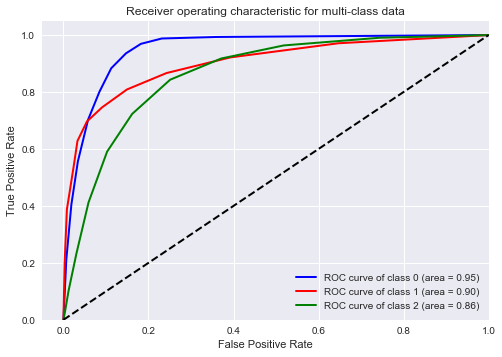

In [166]:
# Binarize the output for ROC evaluation
train_y2 = label_binarize(train_y, classes=[0, 1, 2])
test_y2 = label_binarize(test_y, classes=[0, 1, 2])
n_classes= test_y2.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(rf)
y_score = classifier.fit(train_X, train_y2).predict_proba(test_X)

# Compute ROC curve and ROC area for each class
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#### SVM Model

In [167]:
#Create SVM Model
svm_model= SVC(C = 1, random_state = 123)
svm_model.fit(train_X, train_y)

#create prediction
svm_pred = svm_model.predict(test_X) 

In [168]:
#evaluation model using confusion matrix
cm = confusion_matrix(test_y,svm_pred)
print(cm)
acc= accuracy_score(test_y, svm_pred)
print('acc:',acc)
print(classification_report(test_y, svm_pred))

[[746   0   0]
 [764   0   0]
 [740   0   0]]
acc: 0.33155555555555555
             precision    recall  f1-score   support

          0       0.33      1.00      0.50       746
          1       0.00      0.00      0.00       764
          2       0.00      0.00      0.00       740

avg / total       0.11      0.33      0.17      2250



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### ROC

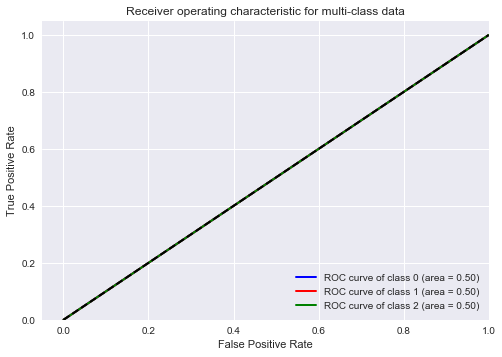

In [169]:
# Binarize the output for ROC evaluation
train_y2 = label_binarize(train_y, classes=[0, 1, 2])
test_y2 = label_binarize(test_y, classes=[0, 1, 2])
n_classes= test_y2.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm_model)
y_score = classifier.fit(train_X, train_y2).decision_function(test_X)

# Compute ROC curve and ROC area for each class
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#### Gradient Boosting

In [173]:
#create GradientBoosting Model
GBT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=7, random_state=0)
GBT.fit(train_X, train_y)

#Create prediction
GBT_pred= GBT.predict(test_X)


In [174]:
#Evaluate model with metric score from GBT
Accuracy = GBT.score(test_X, test_y)
print('Accuracy:', Accuracy)

Accuracy: 0.788


In [175]:
#evaluation model using confusion matrix
cm = confusion_matrix(test_y,GBT_pred)
print(cm)
acc= accuracy_score(test_y, GBT_pred)
print('acc:',acc)
print(classification_report(test_y, GBT_pred))

[[646  22  78]
 [ 59 566 139]
 [ 90  89 561]]
acc: 0.788
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       746
          1       0.84      0.74      0.79       764
          2       0.72      0.76      0.74       740

avg / total       0.79      0.79      0.79      2250



In [176]:
#check predict proba from gradient boosting
GBTpred_proba=GBT.predict_proba(test_X)
GBTpred_proba

array([[9.99577967e-01, 3.49173638e-04, 7.28589024e-05],
       [8.96813382e-08, 9.99989001e-01, 1.09089525e-05],
       [9.99785709e-01, 1.60274908e-05, 1.98263178e-04],
       ...,
       [9.64650407e-01, 8.74936849e-04, 3.44746562e-02],
       [1.11967880e-08, 9.99985083e-01, 1.49058689e-05],
       [7.05426025e-01, 3.07681963e-03, 2.91497155e-01]])

#### ROC

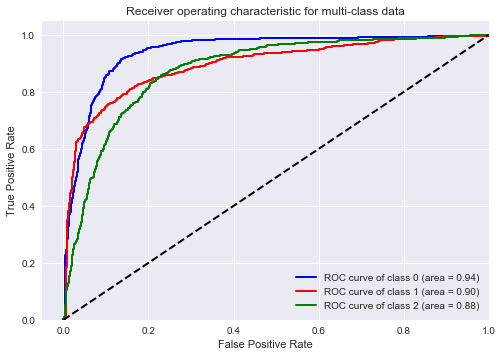

In [177]:
# Binarize the output for ROC evaluation
train_y2 = label_binarize(train_y, classes=[0, 1, 2])
test_y2 = label_binarize(test_y, classes=[0, 1, 2])
n_classes= test_y2.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(GBT)
y_score = classifier.fit(train_X, train_y2).decision_function(test_X)

# Compute ROC curve and ROC area for each class
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Implementasion on Data Test

It can be seen from those models above that gradient boosting has best model evaluation. Accuracy from gradient boosting is 0.79 dan average of ROC curve is around 0.91. So, gradient boosting will be used to predict data test.

In [180]:
#Make prediction on data test using gradient Boosting model
my_prediction= GBT.predict(df_test)

In [181]:
#convert my_prediction to pandas dataframe
my_prediction=pd.DataFrame(my_prediction)
my_prediction.head(4)

,0
0,2
1,0
2,1
3,1


In [182]:
#add column name to my_prediction
my_prediction.columns=['target']
my_prediction.head(4)

,target
0,2
1,0
2,1
3,1


In [183]:
#concat my_prediction with data test
my_prediction_data=pd.concat([df_test,my_prediction],axis=1 )
my_prediction_data.head(4)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,target
0,6.985278,-24.376185,-67.534866,-84.807607,-32.046698,105.779139,18.522057,-30.072502,59.680790,-10.243477,...,3.539415,-67.197899,85.240541,100.114007,3.998199,-249.273817,111.914402,-10.871451,63.884219,2
1,0.477027,78.098773,-165.926432,-94.688766,195.248556,120.357766,16.986081,-141.158790,-59.848439,103.943630,...,-14.191104,48.552744,-5.913016,26.144545,25.247061,-71.538672,-30.696753,67.176863,-26.336899,0
2,-100.522055,63.502689,36.368877,24.343810,-54.754512,49.931363,-145.369300,53.609828,-15.250627,6.191715,...,-8.464808,-6.836888,310.918975,102.804747,24.406161,30.236164,-59.971020,-59.251893,24.595837,1
3,-79.056022,-19.034376,-87.851593,18.989430,129.156202,71.775972,54.377089,36.044274,93.366497,40.270391,...,1.679444,27.143026,11.948213,-10.007375,33.228707,-97.803525,-156.719795,-15.479173,144.547514,1


In [184]:
#count each category from my_prediction
my_prediction_data.target.value_counts()

2    873
0    868
1    759
Name: target, dtype: int64

In [185]:
#Save my_prediction_data to csv and named it output2.csv
my_prediction_data.to_csv('E:/Me/Telkom/output2.csv', index=False, header=True)

In [186]:
#Save my_prediction to csv and named it output.csv
my_prediction.to_csv('E:/Me/Telkom/output.csv', index=False, header=True)